## Convolutional Neural Network (CNN) Tutorial

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("train.csv")
print("Train Shape: ",train.shape)

Train Shape:  (42000, 785)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = pd.read_csv("test.csv")
print("Test Shape:",test.shape)

Test Shape: (28000, 784)


In [ ]:
y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)

In [ ]:
!pip install --upgrade seaborn

 	 # y_train value counts # 
 1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


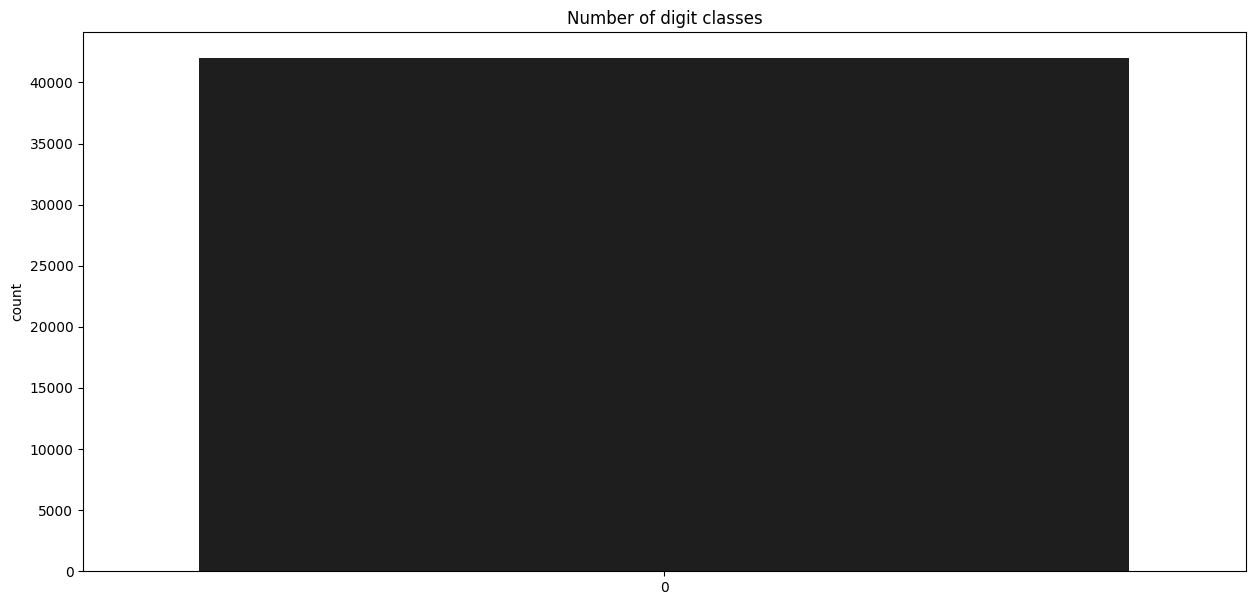

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
print(" \t # y_train value counts # \n",y_train.value_counts())

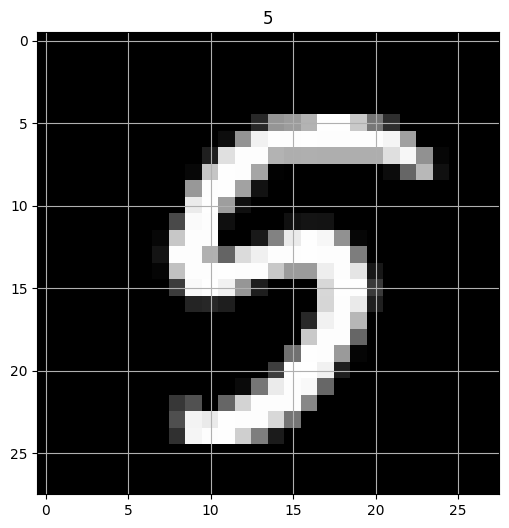

In [ ]:
plt.figure(figsize=(8,6))
img = X_train.iloc[8].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[8,0])
plt.grid()
plt.show()

In [ ]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [ ]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape: ",X_train.shape)
print("x_val shape: ",X_val.shape)
print("y_train shape: ",Y_train.shape)
print("y_val shape: ",Y_val.shape)

x_train shape:  (37800, 28, 28, 1)
x_val shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
y_val shape:  (4200, 10)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=5,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=250),
                              epochs = 50, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[early_stopping])

Epoch 1/50
151/151 [==============================] - 39s 257ms/step - loss: 0.5083 - accuracy: 0.8367 - val_loss: 0.1543 - val_accuracy: 0.9621
Epoch 2/50
151/151 [==============================] - 42s 278ms/step - loss: 0.3501 - accuracy: 0.8893 - val_loss: 0.1168 - val_accuracy: 0.9698
Epoch 3/50
151/151 [==============================] - 48s 316ms/step - loss: 0.2904 - accuracy: 0.9066 - val_loss: 0.0923 - val_accuracy: 0.9740
Epoch 4/50
151/151 [==============================] - 35s 231ms/step - loss: 0.2491 - accuracy: 0.9220 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 5/50
151/151 [==============================] - 34s 227ms/step - loss: 0.2214 - accuracy: 0.9320 - val_loss: 0.0758 - val_accuracy: 0.9779
Epoch 6/50
151/151 [==============================] - 36s 238ms/step - loss: 0.2066 - accuracy: 0.9369 - val_loss: 0.0644 - val_accuracy: 0.9798
Epoch 7/50
151/151 [==============================] - 35s 229ms/step - loss: 0.1911 - accuracy: 0.9402 - val_loss: 0.0626 - val_ac

In [ ]:
print("Accuracy of the model is " , model.evaluate(X_val, Y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is " , model.evaluate(X_val, Y_val, batch_size=batch_size)[0])

17/17 [==============================] - 1s 70ms/step - loss: 0.0297 - accuracy: 0.9907
Accuracy of the model is  99.07143115997314 %
17/17 [==============================] - 1s 47ms/step - loss: 0.0297 - accuracy: 0.9907
Loss of the model is  0.029732175171375275


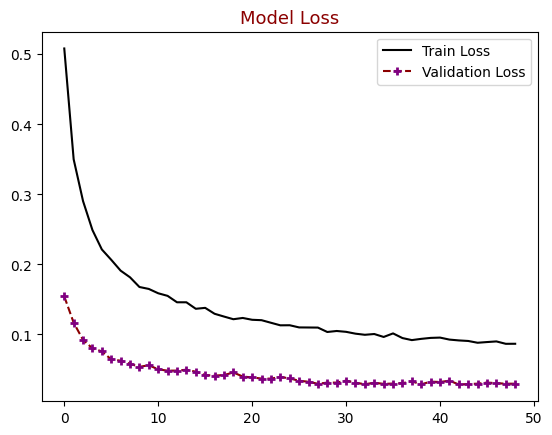

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

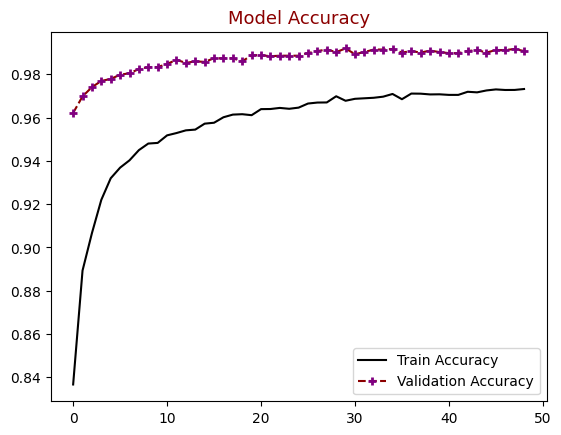

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

132/132 [==============================] - 3s 19ms/step


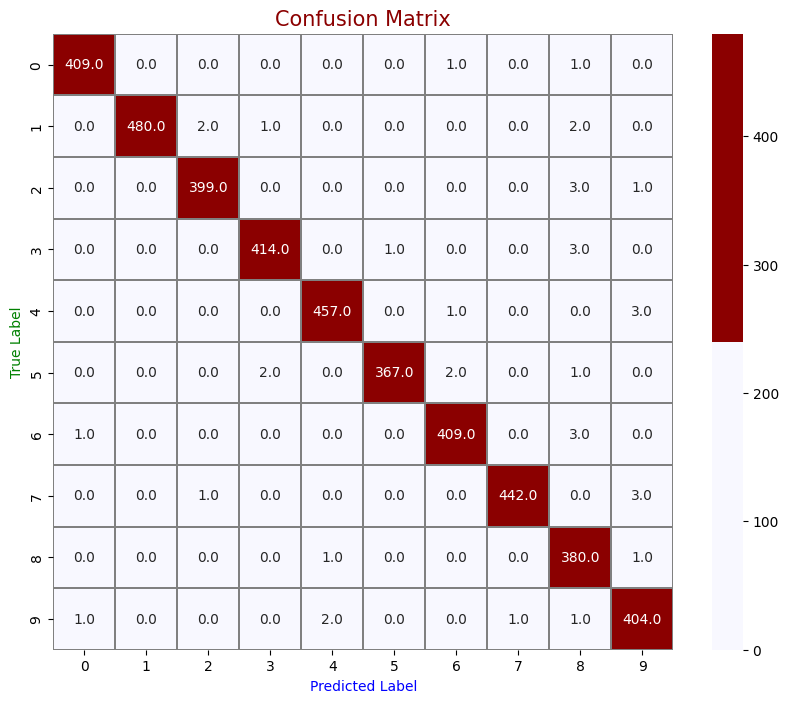

In [ ]:
# We make predictions using the model we have created.
Y_pred = model.predict(X_val)
# argmax = To briefly mention it, it will give the index of the value with the highest value.
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# We do the same for the y_val values. because we will compare these values.
Y_true = np.argmax(Y_val,axis = 1)

"""
Let's explain the process we have done above with an example so that it sits on our minds.

Y_pred = [0.12, 1.258, 3,4448], Let's assume we have such an array.
argmax -- > it gives us the index of the largest value here.your biggest value here is our value
starting with 3. its index is 2. argmax gives us this.
"""
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# 색상
cmap = mpl.colors.ListedColormap(['#f8f8ff', 'darkred'])

# 그래프
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap=cmap,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label", color = "blue")
plt.ylabel("True Label", color = "green")
plt.title("Confusion Matrix", color = "darkred", size = 15)
plt.show()